In [41]:
import torch
from torch import Tensor
import matplotlib.pyplot as plt


def plot_data(x: list[float], y: list[float]):
    ax = plt.subplots()[1]
    #plt.plot(x, y)
    #plt.show()
    ax.scatter(x, y, color='red')


def plot_labels_pred(X: Tensor, y: Tensor, predictions: Tensor, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(X, y)
    ax.scatter(X, predictions, color='red')
    #ax.set_ylim(-300,100)


def mse(predictions: Tensor, labels: Tensor) -> Tensor:
    return ((predictions-labels)**2).mean().sqrt()

In [42]:
X = torch.arange(0, 20).float()

X

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [43]:
def quadratic_equation(x: Tensor, abc: tuple[int]):
    a = abc[0]
    b = abc[1]
    c = abc[2]
    y = a*(x**2) + (b*x) + c
    return y

def linear_equation(x: Tensor, mb: tuple[int]):
    m = mb[0]
    b = mb[1]
    return m*x + b

In [44]:
#y = quadratic_equation(X, (1, 70, 90))
y = linear_equation(X, (9, 10))

y

tensor([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100., 109.,
        118., 127., 136., 145., 154., 163., 172., 181.])

#### Initialize parameters

In [48]:
params = torch.rand(2).requires_grad_()
epochs = 10
lr = 1e-3

#### Calculate Predictions

In [49]:
def train(epochs: int, verbose: bool) -> Tensor:
    for epoch in range(epochs):
        predictions = linear_equation(X, params)
        loss = mse(predictions, y)
        loss.backward()
        params.data -= lr * params.grad.data
        params.grad = None
        if verbose:
            print(f'Epoch: {epoch+1}  Loss: {loss.item()}.')
    return predictions, loss, params


predictions, loss, params = train(epochs, False)
print(f'Loss: {loss.item()} Parameters: {params.data}')

Loss: 103.97662353515625 Parameters: tensor([0.4324, 0.0427])


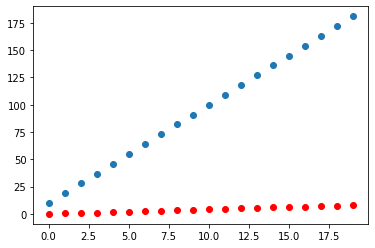

In [50]:
plot_labels_pred(X, y, predictions.detach().numpy())